In [ ]:
# Create the three models, and evaluate them using k-fold cross validation
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset into a dataframe
dataframe = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
dataframe['male'] = dataframe['Sex'] == 'male'

# Divide the dataset into x-features and y-target
x1 = dataframe[['Pclass', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare', 'male']].values
x2 = dataframe[['Pclass', 'Age', 'male']].values
x3 = dataframe[['Age', 'Fare']].values
y = dataframe['Survived'].values

# Do the k-fold cross validation stuff
kf = KFold(n_splits = 5, shuffle = True)
splits = list(kf.split(x1))

def evaluateModel(x, y, split_iterator):
    accuracy, precision, recall, f1 = [], [], [], []
    for train_index, test_index in split_iterator:
        x_train, y_train = x[train_index], y[train_index]
        x_test, y_test = x[test_index], y[test_index]
        model = LogisticRegression()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy), "precision", np.mean(precision), "recall", np.mean(recall), "f1", np.mean(f1))

print("Model with all features:")
evaluateModel(x1, y, splits)
print()
print("Model with pclass, age, gender:")
evaluateModel(x2, y, splits)
print()
print("Model with age, fare:")
evaluateModel(x3, y, splits)

# The model with pclass, age and sex as features is the best model.
# So our final model will be a model that is trained using "pclass", "age" and "sex"
final_model = LogisticRegression()
final_model.fit(x2, y)

prediction = final_model.predict([[3, 25, False]])
print(prediction)

Model with all features:
accuracy: 0.7948454262680125 precision 0.7570482340974143 recall 0.6931093505477308 f1 0.7225022712725562

Model with pclass, age, gender:
accuracy: 0.7903320002539199 precision 0.744099432905403 recall 0.696156103286385 f1 0.7186760733543796

Model with age, fare:
accuracy: 0.6527455087919762 precision 0.6194746376811594 recall 0.24342233959311424 f1 0.3484423911624236
[1]


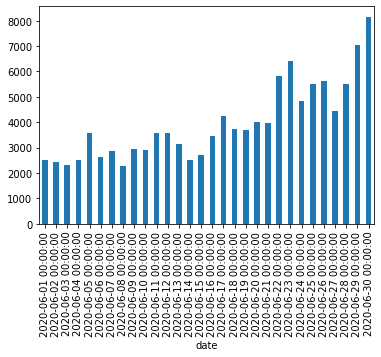

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://www.sololearn.com/uploads/ca-covid.csv")
df.drop('state', axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'], format="%d.%m.%y")
df['month'] = df['date'].dt.month
df.set_index('date', inplace=True)

df[df["month"]==6]["cases"].plot(kind="bar") 

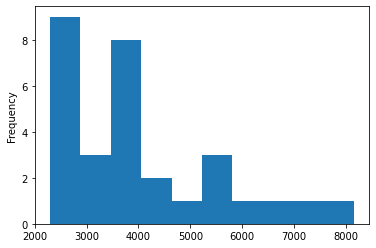

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://www.sololearn.com/uploads/ca-covid.csv")
df.drop('state', axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'], format="%d.%m.%y")
df['month'] = df['date'].dt.month
df.set_index('date', inplace=True)

df[df["month"]==6]["cases"].plot(kind="hist") 

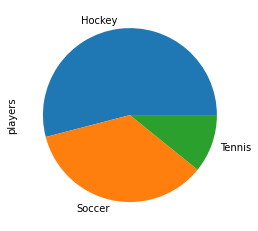

In [ ]:
data = {
    'sport': ["Soccer", "Tennis", "Soccer", "Hockey"],
    'players': [5, 4, 8, 20]
}
df = pd.DataFrame(data)
df.groupby('sport')['players'].sum().plot(kind="pie")